In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sewonghwang/daily-bike-sharing")

print("Path to dataset files:", path)

In [2]:
# 필요한 패키지 설치
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 300

In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/daily-bike-sharing
df = pd.read_csv("C:/Users/KimDongyoung/.cache/kagglehub/datasets/sewonghwang/daily-bike-sharing/versions/1/bike_sharing_daily.csv")

# 데이터 샘플 확인
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [6]:
# 각 컬럼의 속성 및 결측값 확인
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        714 non-null    float64
 10  atemp       707 non-null    float64
 11  hum         706 non-null    float64
 12  windspeed   718 non-null    float64
 13  casual      720 non-null    float64
 14  registered  720 non-null    float64
 15  cnt         731 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 91.5+ KB


instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

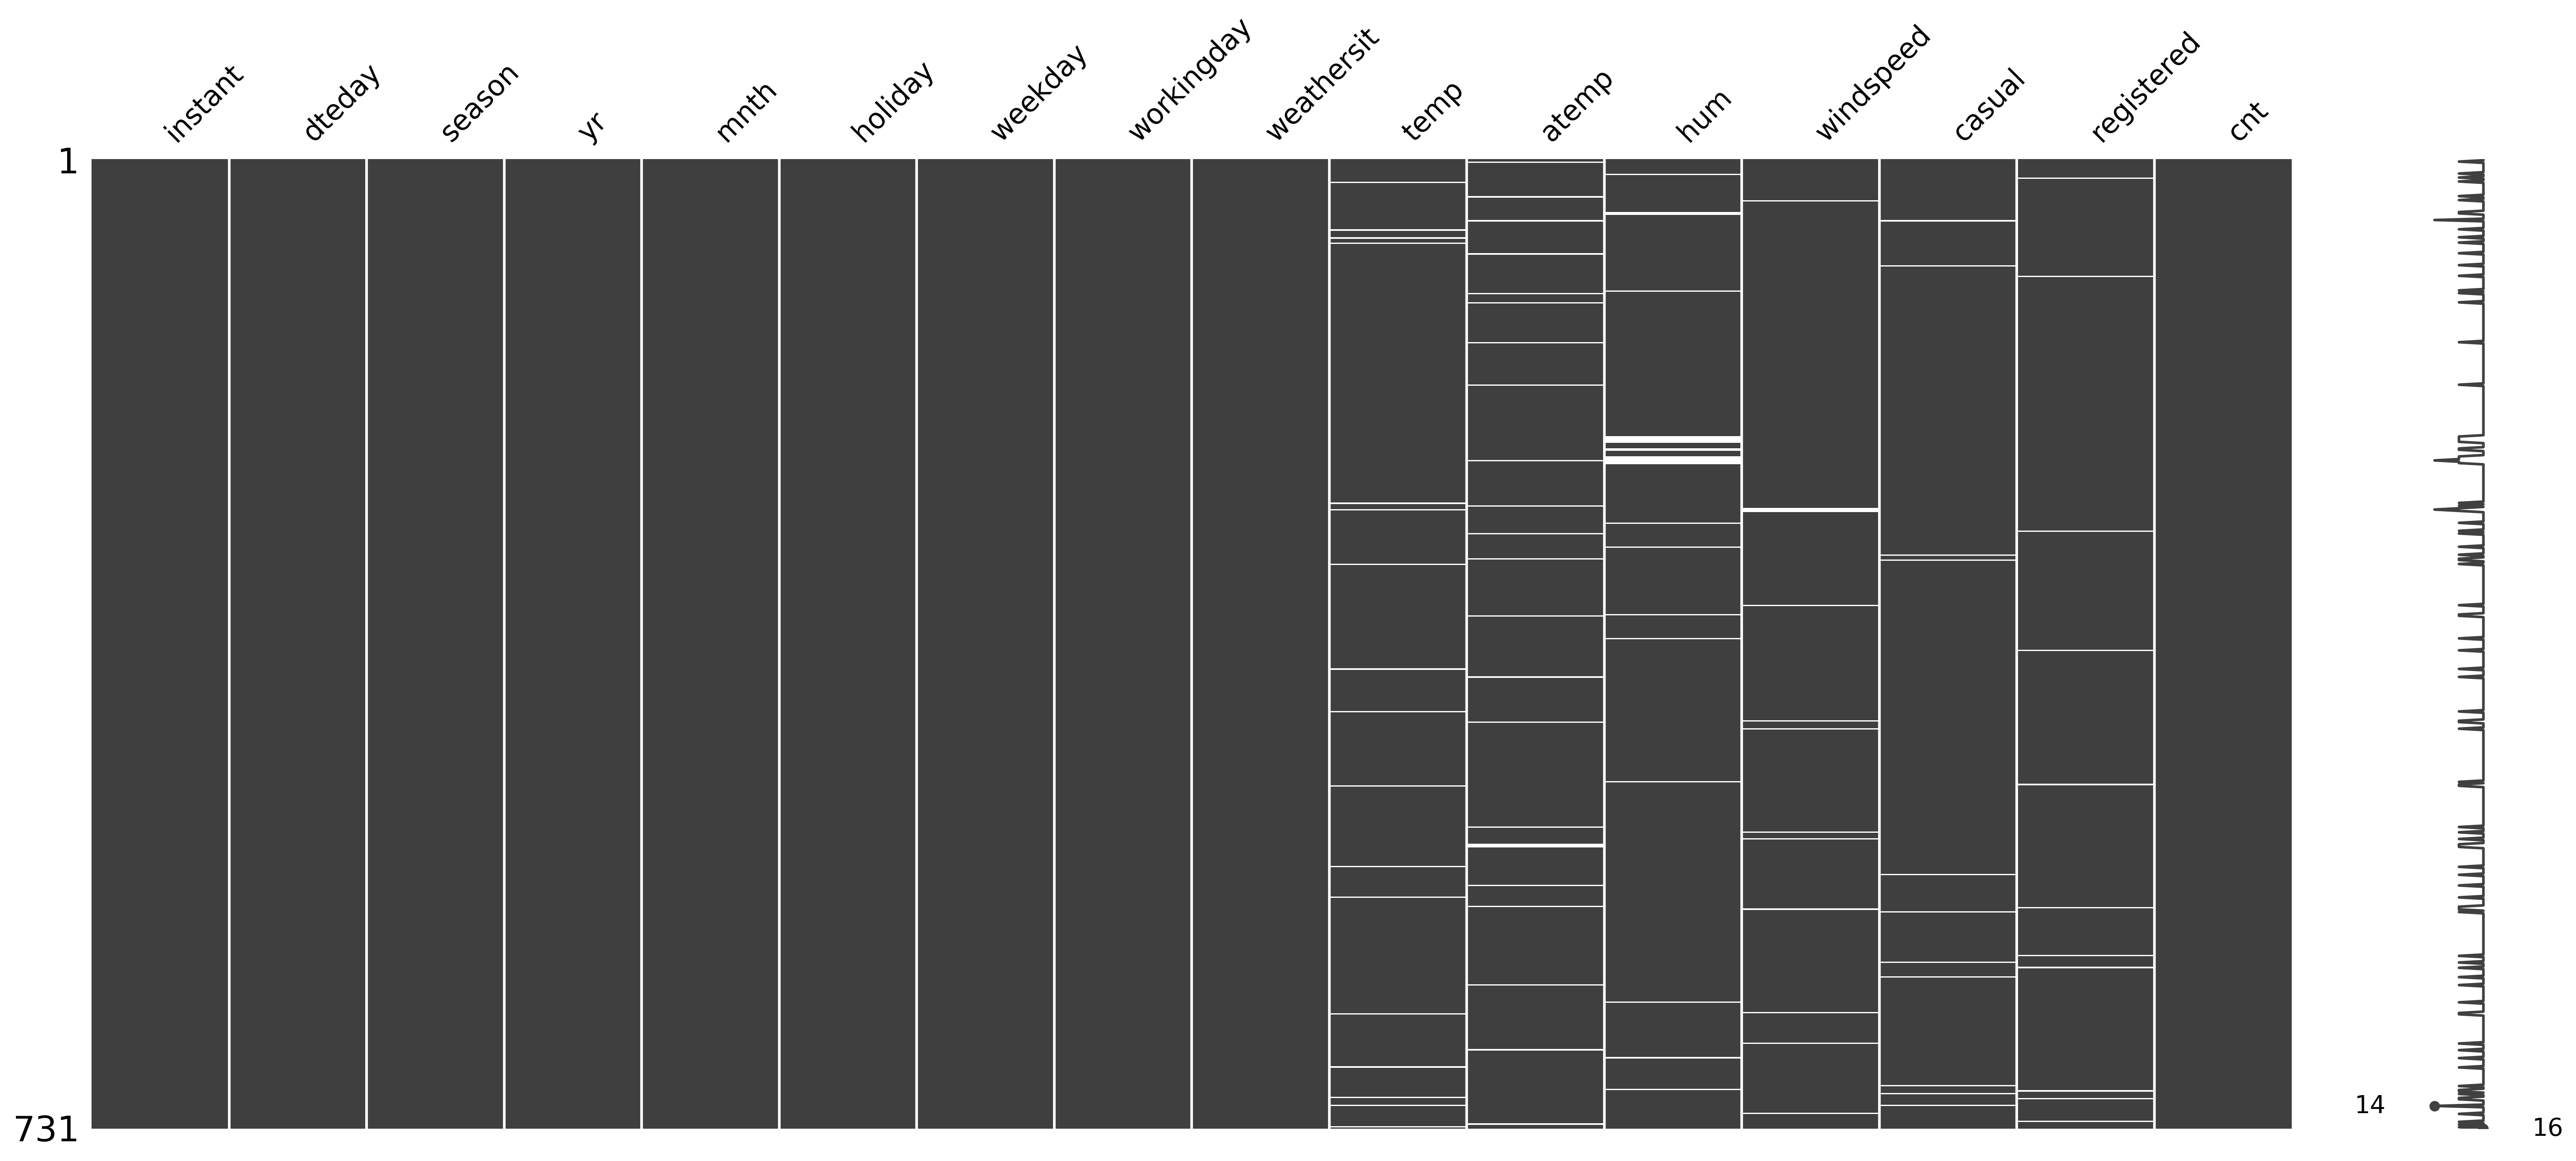

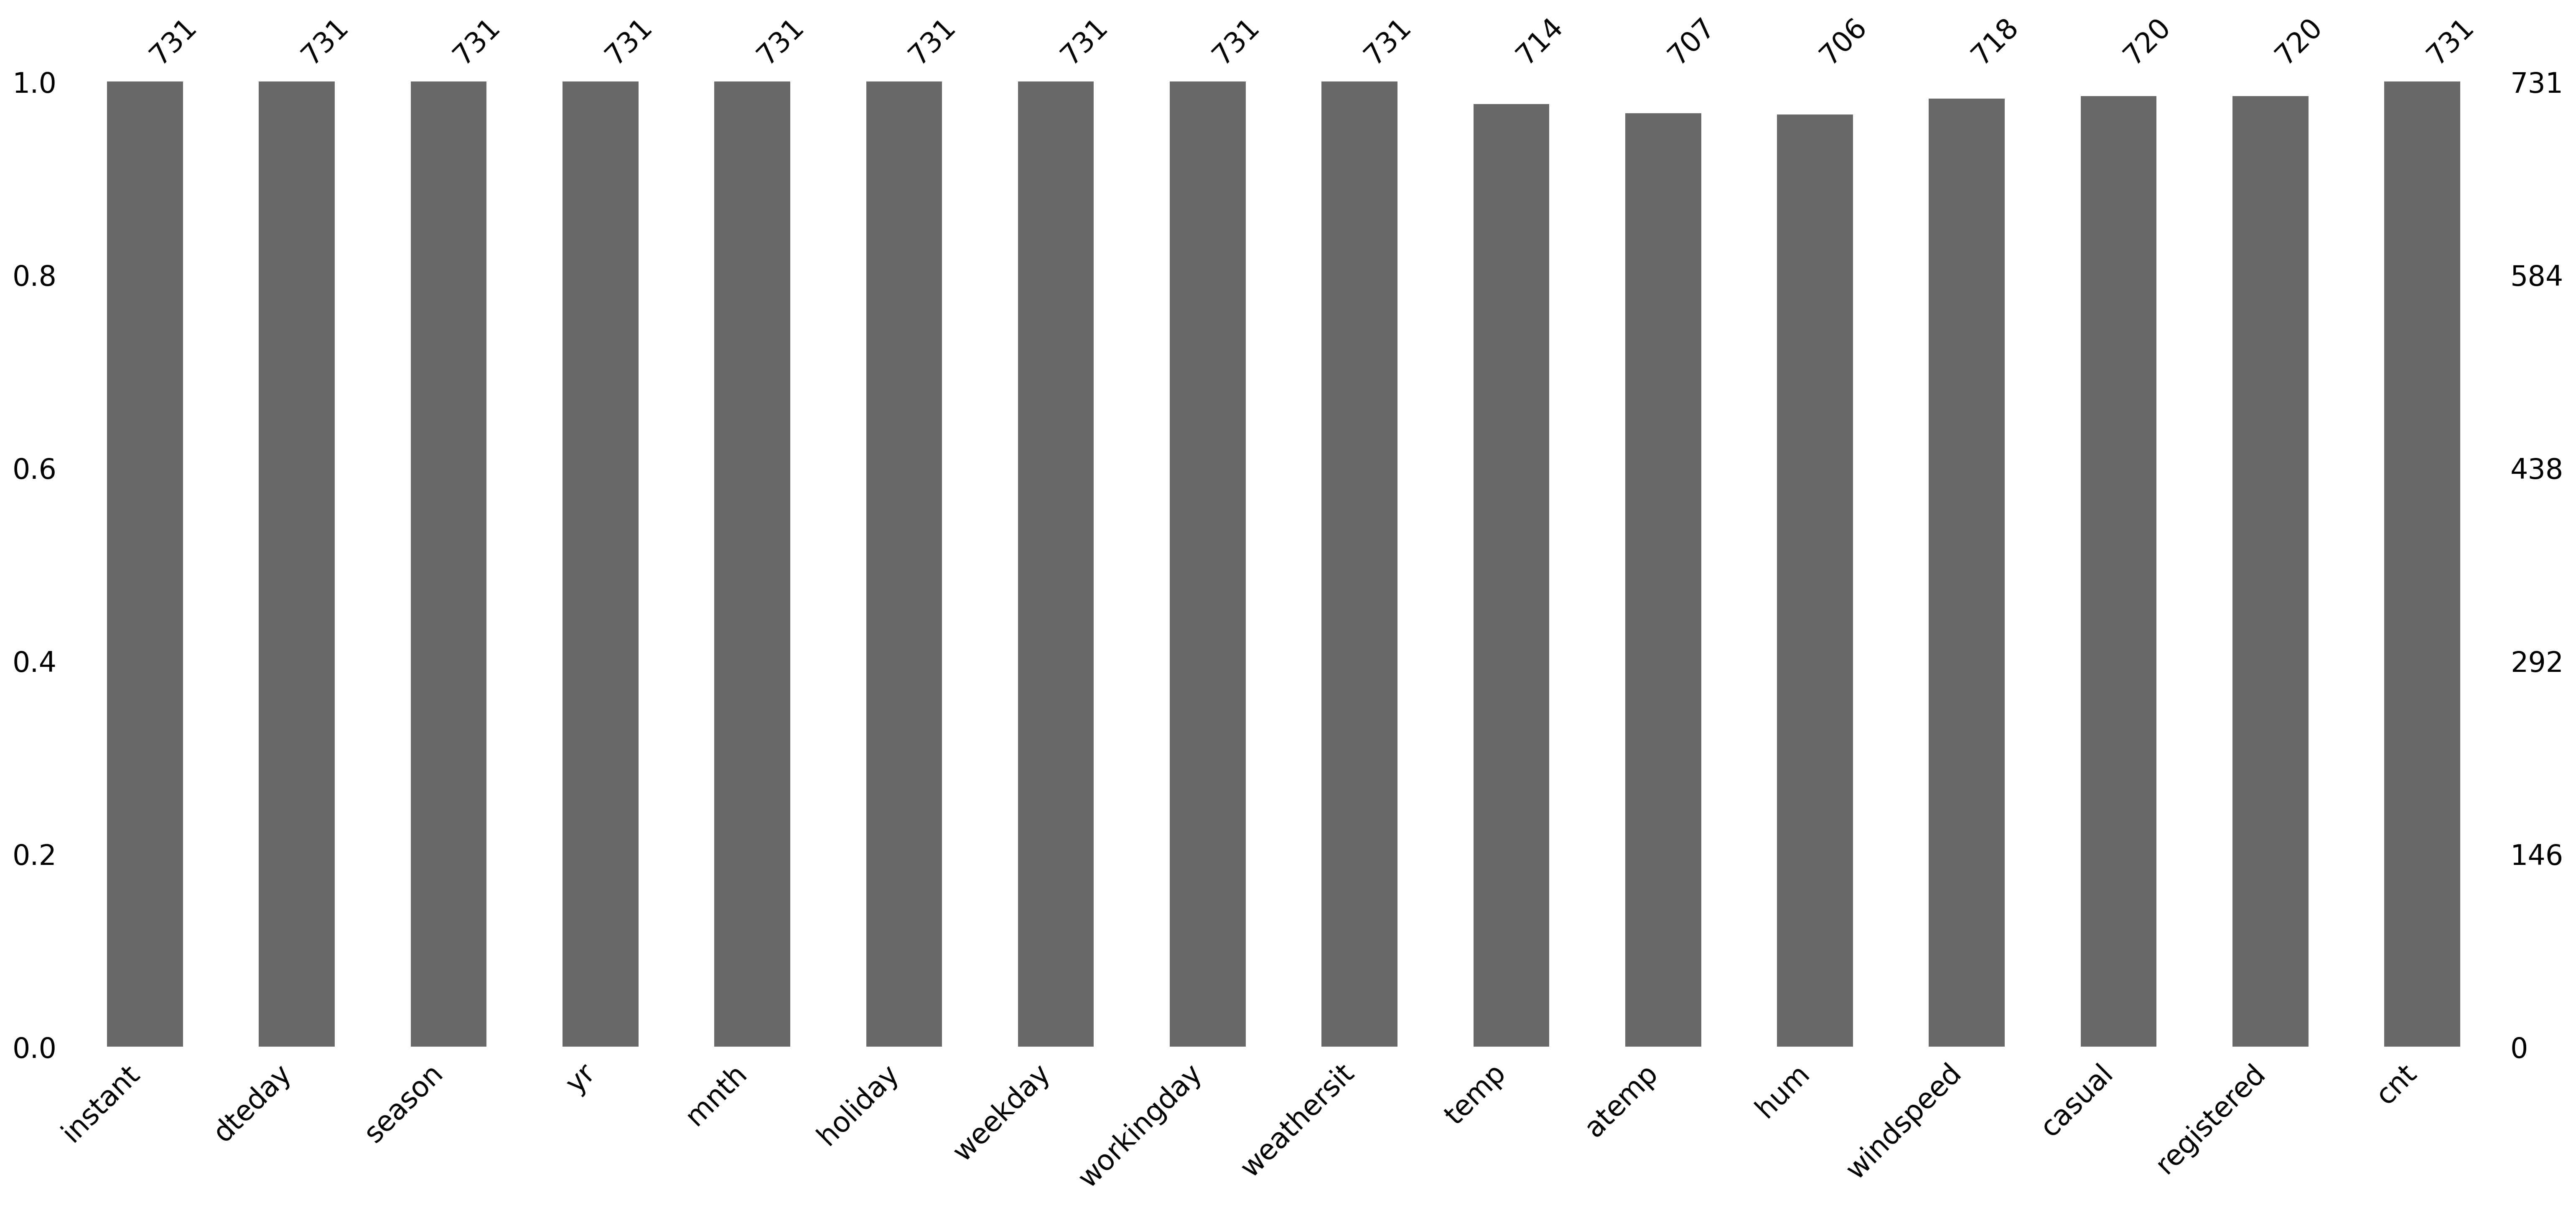

In [7]:
# 결측값 시각화 - 각 컬럼 별의 결측값 시각화

# 결측값 영역 표시
msno.matrix(df)
plt.show() # 결측값은 흰색으로 표시됨

# 결측값 막대 그래프
msno.bar(df)
plt.show()

In [8]:
# 결측값이 아닌 빈 문자열이 있는지 확인

def is_emptystring(x):
    return x.eq('').any()
 
df.apply(lambda x:is_emptystring(x))

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [9]:
df_ = df.drop(columns=['dteday'])
df_.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600


In [13]:
# 결측값 표본 제거, dropna() 사용법
# 결측값이 있는 행 제거

# 모든 컬럼이 결측값인 행 제거
df_drop_all = df.dropna(how='all')

#  세개 이상의 컬럼이 결측값인 행 제거
df_drop_3 = df.dropna(thresh=3)

#  특정 컬럼(temp)이 결측값인 행 제거
df_drop_slt = df.dropna(subset=['temp']) # 특정 컬럼 temp에 결측값이 있는 행 제거

# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = df.dropna(how='any')

# df_drop_3.isnull().sum()

In [14]:
df_drop_any.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     634 non-null    int64  
 1   dteday      634 non-null    object 
 2   season      634 non-null    int64  
 3   yr          634 non-null    int64  
 4   mnth        634 non-null    int64  
 5   holiday     634 non-null    int64  
 6   weekday     634 non-null    int64  
 7   workingday  634 non-null    int64  
 8   weathersit  634 non-null    int64  
 9   temp        634 non-null    float64
 10  atemp       634 non-null    float64
 11  hum         634 non-null    float64
 12  windspeed   634 non-null    float64
 13  casual      634 non-null    float64
 14  registered  634 non-null    float64
 15  cnt         634 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 84.2+ KB


In [10]:
## 결측값 기본 대치 방법들, fillna() 사용법
# 결측값을 특정값으로 대치

# 특정값(0)으로 대치 - 전체 컬럼
df_0_all = df.fillna(0)

# 특정값(0)으로 대치 - 컬럼 지정
df_0_slt = df.fillna({'temp':0}) # temp 컬럼의 결측값을 0으로 대치

# 평균값 대치 - 전체 컬럼
df_mean_all = df.fillna(df_.mean()) # 전체 컬럼의 결측값을 각 컬럼의 평균값으로 대치

# 평균값 대치 - 컬럼 지정
df_mean_slt = df.fillna({'temp':df['temp'].mean()}) # temp 컬럼의 결측값을 temp 컬럼의 평균값으로 대치

# 중앙값 대치 - 전체 컬럼
df_median_all = df.fillna(df_.median()) # 전체 컬럼의 결측값을 각 컬럼의 중앙값으로 대치

# 중앙값 대치 - 컬럼 지정
df_median_slt = df.fillna({'temp':df['temp'].median()}) # temp 컬럼의 결측값을 temp 컬럼의 중앙값으로 대치

# 최빈값 대치 - 전체 컬럼
df_mode_all = df.fillna(df.mode()) # 전체 컬럼의 결측값을 각 컬럼의 최빈값으로 대치

# 최빈값 대치 - 컬럼 지정
df_mode_slt = df.fillna({'temp':df['temp'].mode()}) # temp 컬럼의 결측값을 temp 컬럼의 최빈값으로 대치

# 최댓값 대치 - 전체 컬럼
df_max_all = df.fillna(df.max()) # 전체 컬럼의 결측값을 각 컬럼의 최댓값으로 대치

# 최댓값 대치 - 컬럼 지정
df_max_slt = df.fillna({'temp':df['temp'].max()}) # temp 컬럼의 결측값을 temp 컬럼의 최댓값으로 대치

# 최솟값 대치 - 전체 컬럼
df_min_all = df.fillna(df.min())  # 전체 컬럼의 결측값을 각 컬럼의 최솟값으로 대치

# 최솟값 대치 - 컬럼 지정
df_min_slt = df.fillna({'temp':df['temp'].min(),'hum':df['hum'].min()}) # temp 컬럼의 결측값을 temp 컬럼의 최솟값으로 대치, hum 컬럼의 결측값을 hum 컬럼의 최솟값으로 대치


df_min_slt.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp         24
hum            0
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

In [11]:
# 결측값 보간 대치 방법들

# 전 시점 값으로 대치 - 컬럼 지정
df1 = df.copy()
df1['temp'].fillna(method ='pad' ,inplace=True) # temp 컬럼의 결측값을 전 시점 값으로 대치, inplace=True 옵션으로 원본 df1에 대치 결과 저장

# 뒤 시점 값으로 대치 - 전체 컬럼
df.fillna(method ='bfill')

# 뒤 시점 값으로 대치 - 결측값 연속 한번만 대치
df.fillna(method='bfill', limit=1) 

# 보간법 함수 사용하여 대치 - 단순 순서 방식
ts_intp_linear = df.interpolate(method='values') # 양쪽 시점의 값으로 대치, 결측값이 연속으로 있는 경우에는 선형 보간법을 사용하여 대치

# 보간법 함수 사용하여 대치 - 시점 인덱스 사용

    # dteday 컬럼 시계열 객체 변환
df['dteday'] = pd.to_datetime(df['dteday']) # dteday 컬럼을 시계열 객체로 변환

    # dteday 컬럼 인덱스 변경
df_i = df.set_index('dteday') # dteday 컬럼을 인덱스로 변경

    # 시점에 따른 보간법 적용
df_time = df_i.interpolate(method='time') # 시점에 따른 보간법을 사용하여 결측값 대치
df_time.isnull().sum()

C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_24040\4089400710.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['temp'].fillna(method ='pad' ,inplace=True) # temp 컬럼의 결측값을 전 시점 값으로 대치, inplace=True 옵션으로 원본 df1에 대치 결과 저장
C:\Users\KimDongyoung\AppData\Local\Temp\ipykernel_24040\4089400710.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['temp'].fillna(method ='pad' ,inplace=True) # temp 컬럼의 결측값을 전 시점 값으로 대치, inplace=True 옵

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

다중 대치   
변수 하나씩 돌아가며 회귀모형 기반으로 결측값을 예측    
각각의 변수에 대한 조건부 분포를 이용해 대치하는 순차적 회귀 기반의 반복적 대치 방법    
변수마다 다른 회귀모델을 쓸 수 있음   

작동원리    
결측치를 초기값(평균, 중앙값 등)으로 채운다.    
하나의 변수를 선택한 후 나머지 변수들을 독립 변수로 사용해 회귀 모델을 학습한다.    
결측치를 예측한다.    
다음 변수로 이동한 후 위의 방식을 여러번 반복한다.     

In [15]:
#다중 대치(MICE) 

# dteday 컬럼 제거
df_dp = df.drop(['dteday'],axis=1)

# 다중 대치 알고리즘 설정
imputer=IterativeImputer(imputation_order='ascending', # imputation_order='ascending' : 오름차순으로 대치
                         max_iter=10,random_state=42, # max_iter=10 : 최대 10회 반복
                         n_nearest_features=5) # n_nearest_features=5 : 5개 피처를 사용하여 결측값 대치

# 다중 대치 적용
df_imputed = imputer.fit_transform(df_dp) # df_dp 데이터프레임에 다중 대치 적용

# 판다스 변환 및 컬럼 설정
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = ['instant','season','yr','mnth','holiday'
                    ,'weekday','workingday','weathersit','temp'
                    ,'atemp','hum','windspeed','casual','registered','cnt']

df_imputed.isnull().sum()

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64